In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt;
import seaborn as sns;sns.set()
import mglearn

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [49]:
%%HTML
<style>
.box {
    border: 1px double dodgerblue;
    padding: 5px;
}
.note {
    font-size: 20;
    color: teal;
    font-weight: bold;
}
.highlight {
    color: green;
    font-family: verdana;
}
.tag {
    background: red;
    color: white;
    padding: 3px;
}
.warning {
    background: red;
    padding: 12px;
    font-size: 24px;
    color: white;
    text-align: center;
    font-family: verdana;
}
</style>

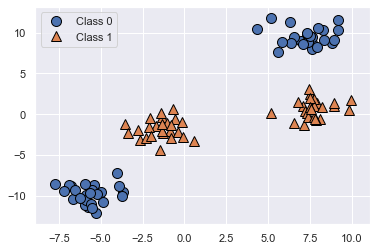

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers = 4, random_state = 8)
y = y % 2
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(['Class 0', 'Class 1'])

Transformation from 2D to 3D: $(x, y)$ to $(x, y, x^2 + y^2)$

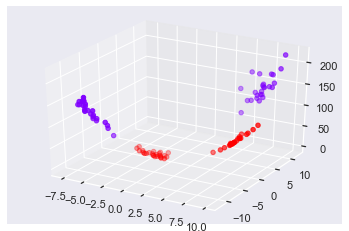

In [3]:
X3D = np.c_[X, X[:,0] ** 2 + X[:,1] ** 2]
from mpl_toolkits import mplot3d
ax = plt.subplot(projection = '3d')
ax.scatter(X3D[:,0], X3D[:, 1], X3D[:, 2], c = y , cmap = 'rainbow')

In [4]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X3D, y)
clf.coef_, clf.intercept_

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(array([[ 0.13701094, -0.06558136, -0.0238029 ]]), array([1.38994299]))

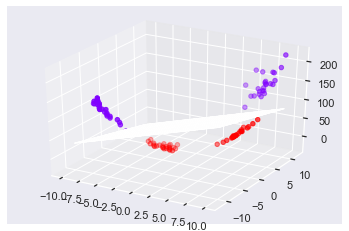

In [7]:

xx = np.linspace(-10, 10)
yy = np.linspace(-10, 10)
xx, yy = np.meshgrid(xx, yy)
a, b, c = clf.coef_[0]
d = clf.intercept_[0]
zz = (-d - a * xx - b * yy) / c

ax = plt.subplot(projection = '3d')
ax.scatter(X3D[:,0], X3D[:,1], X3D[:,2], c = y, cmap = 'rainbow')
ax.plot_surface(xx, yy, zz, alpha = .3, cmap = 'Spectral')


# Understanding SVM

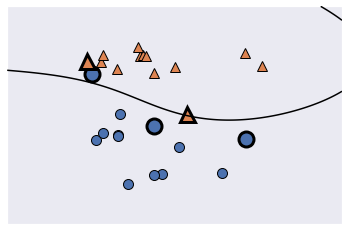

In [39]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
mglearn.discrete_scatter(X[:,0], X[:,1], y)
clf = SVC(C = 10, gamma = .1)
clf.fit(X, y)
mglearn.plots.plot_2d_separator(clf, X)
vecs = clf.support_vectors_
mglearn.discrete_scatter(vecs[:,0], vecs[:,1],  clf.dual_coef_.ravel() > 0, s = 15, markeredgewidth = 3)


## Tuning SVM

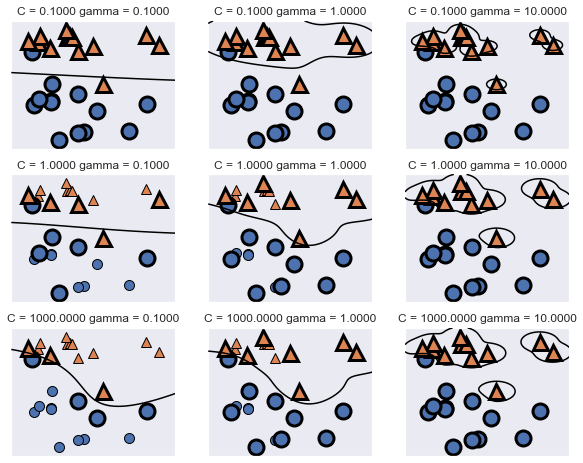

In [44]:
fig, axes = plt.subplots(3,3,subplot_kw = {'xticks' : [], 'yticks' : []}, figsize = (10, 8))
logC = [-1, 0, 3]
logGamma = [-1, 0, 1]
for i, ax in enumerate(axes.flat):
    mglearn.plots.plot_svm(logC[i // 3], logGamma[i % 3], ax = ax)

<h3>NOTE:</h3>
    <ul class = 'note box'><i>Parameter <code>C</code></i>:
        <li>Large <code>C</code>: Hard margin (low bias) </li>
        <li>Small <code>C</code>: Soft margin (low variance)</li>
    </ul>
    <ul class = 'note box'><i>Parameter <code>Gamma</code></i>:
        <li>Large <code>gamma</code>: Large number of clusters <span class = 'tag'>More complex model</span></li>
        <li>Small <code>gamma</code>: Small number of clusters</li>
    </ul>
    

<ul class = 'note'>Important parameters:
    <li>The type of Kernel: <code>kernel</code></li>
    <li>Parameter <code>C</code></li>
    <li>kernel-specific parameters: <code>gamma</code>(RBF), <code>degree</code>(poly), ...
</ul>

<p class = 'warning'>
    SVM is very sensative to <i>Feature Scaling</i><br/>
    &#9654;Do perform <i>Feature Scaling</i> for SVM
</p>

### Example: Breast Cancer dataset

In [51]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, train_size = .8, test_size = .2, random_state = 6)
clf = SVC()
clf.fit(x_train, y_train)
print('Train score: %.3f' % clf.score(x_train, y_train))
print('Test score: %.3f' % clf.score(x_test, y_test))


Train score: 1.000
Test score: 0.509


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<b>Analysis:</b><br>
The model fits perfectly the training set but performs poorly on the test set.<br>
This is due to the fact that we haven't normalize features in our dataset (each feature has different scaling, so the one having larger scaling will dominate the optimization process).



In [65]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(cancer.data)
y = cancer.target
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = .8, test_size = .2, random_state = 42)
clf = SVC()
clf.fit(x_train, y_train)
print('Train score: %.3f' % clf.score(x_train, y_train))
print('Test score: %.3f' % clf.score(x_test, y_test))


Train score: 0.987
Test score: 0.974


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
